https://thebook.io/080324/part05/ch18/02/

In [1]:
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

In [3]:
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [9]:
model = models.Sequential()
model.add(layers.Embedding(5000, 100))
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(64, 5, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=4)) #MaxPooling1D(pool_size=4) 1x4 이용하여 맥스풀링
model.add(layers.LSTM(55))
model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout_1 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d_1 (Conv1D)           (None, None, 64)          32064     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, None, 64)         0         
 1D)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 55)                26400     
                                                                 
 dense_1 (Dense)             (None, 1)                 56        
                                                      

In [5]:
print(len(X_train))
print(len(X_test))

25000
25000


In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, y_train, batch_size=40, epochs=100,
                    validation_split=0.25, callbacks=[early_stopping])

Epoch 1/100
469/469 [==============================] - 46s 93ms/step - loss: 0.4096 - accuracy: 0.7974 - val_loss: 0.3041 - val_accuracy: 0.8787
Epoch 2/100
469/469 [==============================] - 45s 95ms/step - loss: 0.2333 - accuracy: 0.9095 - val_loss: 0.2744 - val_accuracy: 0.8854
Epoch 3/100
469/469 [==============================] - 40s 86ms/step - loss: 0.1831 - accuracy: 0.9336 - val_loss: 0.2650 - val_accuracy: 0.8923
Epoch 4/100
469/469 [==============================] - 40s 86ms/step - loss: 0.1503 - accuracy: 0.9459 - val_loss: 0.3089 - val_accuracy: 0.8810
Epoch 5/100
469/469 [==============================] - 41s 87ms/step - loss: 0.1254 - accuracy: 0.9557 - val_loss: 0.3421 - val_accuracy: 0.8862
Epoch 6/100
469/469 [==============================] - 43s 91ms/step - loss: 0.0960 - accuracy: 0.9666 - val_loss: 0.3437 - val_accuracy: 0.8845


In [7]:
print('Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 12s 15ms/step - loss: 0.3590 - accuracy: 0.8765
Test Accuracy: 0.8765


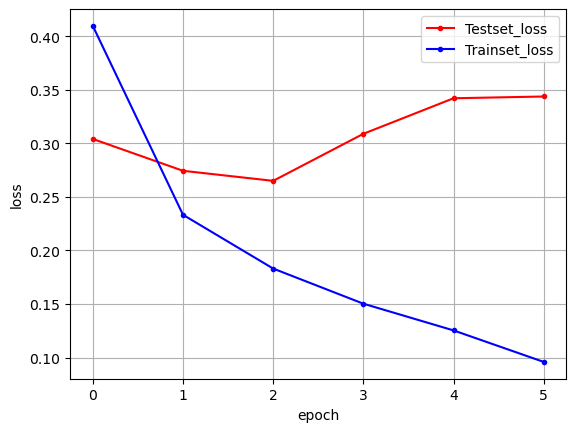

In [8]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다. 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()